# Predicting Customer Churn with Survival Analysis

#### WA_Fn-UseC_-Telco-Customer-Churn.csv contains 7,043 rows with 21 columns. 

## Dataset Resources

#### [Telco customer churn (11.1.3+) at IBM](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns # Graphs
import matplotlib.pyplot as plt # Graphs

from sklearn import preprocessing #for normalization
import lifelines # KaplanMeier

In [2]:
import pandas as pd
Telco = pd.read_csv('https://raw.githubusercontent.com/treselle-systems/'
    'customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Changing object columns to numericals.

In [ ]:
object_columns = Telco_Cox.select_dtypes(include='object').columns 

for col in object_columns:
    print(Telco_Cox[col].value_counts())

#### Checking for unique values for all object columns did not yield concise results.

### Tasks need to be done # 1
* Churn, tenure will be converted into float
* TotalCharges will be converted into numeric
* Dropping customerID column and creating a new dataframe called Telco_Cox.

In [4]:
Telco['Churn'] = (Telco['Churn'] == 'Yes').astype('float')
Telco['tenure'] = Telco['tenure'].astype('float')
Telco.TotalCharges = pd.to_numeric(Telco.TotalCharges, errors='coerce')

In [5]:
features_to_drop = ['customerID']
Telco_Cox = Telco.drop(features_to_drop, axis=1).copy()

In [6]:
object_columns = Telco_Cox.select_dtypes(include='object').columns 

for col in object_columns:
    print(Telco_Cox[col].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

### Tasks need to be done # 2
* Yes/No object variables will be changed to binaries.</br>
('Partner','Dependents','PhoneService','PaperlessBilling','OnlineBackup','Churn')</br>
</br>
* Yes/No/No internet service variables can also be changed into binaries
('MultipleLines', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies')
* Gender will be numerically transformed - 0 for female, 1 for male

In [7]:
binary_columns = ['Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','OnlineSecurity','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for columns in binary_columns:
    Telco_Cox[columns] = Telco_Cox[columns] == 'Yes'
Telco_Cox['OnlineBackup'] = Telco_Cox['OnlineBackup'] == "Yes" # ??? throws error without double quoatation.
Telco_Cox.gender = Telco_Cox.gender.apply(lambda x: 0 if x == "Male" else 1)

In [8]:
Telco_Cox.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,True,False,1.0,False,False,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.85,29.85,0.0
1,0,0,False,False,34.0,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.95,1889.50,0.0
2,0,0,False,False,2.0,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.85,108.15,1.0
3,0,0,False,False,45.0,False,False,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,0.0
4,1,0,False,False,2.0,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.70,151.65,1.0


In [9]:
Telco_Cox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   bool   
 3   Dependents        7043 non-null   bool   
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   bool   
 6   MultipleLines     7043 non-null   bool   
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   bool   
 9   OnlineBackup      7043 non-null   bool   
 10  DeviceProtection  7043 non-null   bool   
 11  TechSupport       7043 non-null   bool   
 12  StreamingTV       7043 non-null   bool   
 13  StreamingMovies   7043 non-null   bool   
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   bool   
 16  PaymentMethod     7043 non-null   object 


In [10]:
Telco_Cox['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [11]:
Telco_Cox['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [12]:
Telco_Cox['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

### Tasks need to be done # 3
* Remaining ('InternetService', 'Contract', 'PaymentMethod') columns will be one-hot encoded.

In [13]:
one_hot = ['MultipleLines','Contract', 'PaymentMethod','InternetService']
Telco_Cox = pd.get_dummies(Telco_Cox,columns=one_hot,prefix=one_hot, drop_first=False)

In [14]:
Telco_Cox.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                       bool
Dependents                                    bool
tenure                                     float64
PhoneService                                  bool
OnlineSecurity                                bool
OnlineBackup                                  bool
DeviceProtection                              bool
TechSupport                                   bool
StreamingTV                                   bool
StreamingMovies                               bool
PaperlessBilling                              bool
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                      float64
MultipleLines_False                          uint8
MultipleLines_True                           uint8
Contract_Month-to-month                      uint8
Contract_One year              

#### All columns are either int or floats.

In [15]:
Telco_Cox.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
MultipleLines_False                         0
MultipleLines_True                          0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Bank transfer (autom

In [16]:
Telco_Cox[Telco_Cox.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_False,MultipleLines_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
488,1,0,True,True,0.0,False,True,False,True,True,True,False,True,52.55,NaN,0.0,1,0,0,0,1,1,0,0,0,1,0,0
753,0,0,False,True,0.0,True,False,False,False,False,False,False,False,20.25,NaN,0.0,1,0,0,0,1,0,0,0,1,0,0,1
936,1,0,True,True,0.0,True,True,True,True,False,True,True,False,80.85,NaN,0.0,1,0,0,0,1,0,0,0,1,1,0,0
1082,0,0,True,True,0.0,True,False,False,False,False,False,False,False,25.75,NaN,0.0,0,1,0,0,1,0,0,0,1,0,0,1
1340,1,0,True,True,0.0,False,True,True,True,True,True,False,False,56.05,NaN,0.0,1,0,0,0,1,0,1,0,0,1,0,0
3331,0,0,True,True,0.0,True,False,False,False,False,False,False,False,19.85,NaN,0.0,1,0,0,0,1,0,0,0,1,0,0,1
3826,0,0,True,True,0.0,True,False,False,False,False,False,False,False,25.35,NaN,0.0,0,1,0,0,1,0,0,0,1,0,0,1
4380,1,0,True,True,0.0,True,False,False,False,False,False,False,False,20.00,NaN,0.0,1,0,0,0,1,0,0,0,1,0,0,1
5218,0,0,True,True,0.0,True,False,False,False,False,False,False,True,19.70,NaN,0.0,1,0,0,1,0,0,0,0,1,0,0,1
6670,1,0,True,True,0.0,True,False,True,True,True,True,False,False,73.35,NaN,0.0,0,1,0,0,1,0,0,0,1,1,0,0


#### 11 counts of NaN values in TotalCharges are strange. They are on contracts, accruing yet data does not state what services they are on. Will insert 0 into NaN values.
### Tasks need to be done # 4
* 11 records with NaN in TotalCharges will be dropped.

In [17]:
Telco_Cox['TotalCharges'].fillna(0, inplace=True)

In [18]:
Telco_Cox.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
MultipleLines_False                        0
MultipleLines_True                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMet

In [19]:
durations = Telco_Cox['tenure'].values
event_observed = Telco_Cox['Churn'].values
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations = durations, event_observed=event_observed, label='Estimate for Average Customer')

<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 5174 right-censored observations>

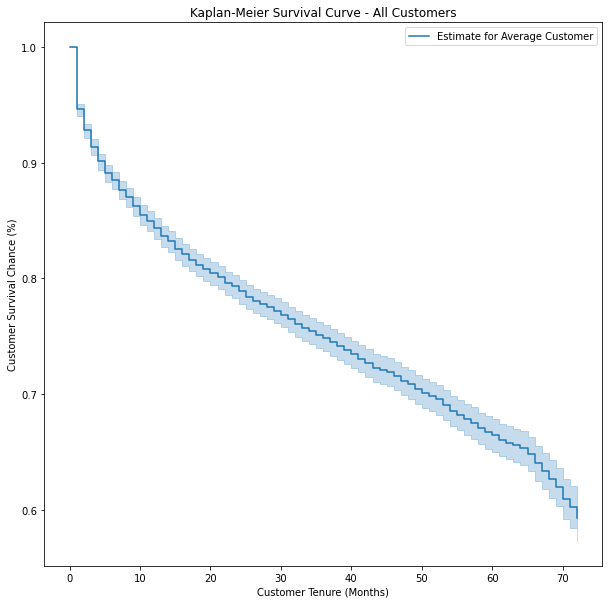

In [20]:
# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,10))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve - All Customers')
ax.set_xlabel('Customer Tenure (Months)')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

In [21]:
cph = lifelines.CoxPHFitter(penalizer=0.1, alpha = 0.05)
cph.fit(Telco_Cox, duration_col = 'tenure',event_col ='Churn')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13884.63
         time fit was run = 2023-02-05 14:09:45 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
gender                                    0.04       1.04       0.04            -0.04             0.11                 0.96                 1.12
SeniorCitizen                             0.04       1.04       0.05            -0.06             0.13                 0.94                 1.14
Partner                                  -0.30       0.74       0.04            -0.39            -0.22                 0.68                 0.80
Dependents                               -0.15       0.86       0.05            -0.25            -0.05                 0.78                 0.95
PhoneService                              0.06       1.06       0.08            -0.09             0.21                 0.91                 1.24
OnlineSecurity                           -0.34       0.71       0.05            -0.44            -0.24                 0.64                 0.78
OnlineBackup                             -0.28       0.76       0.04            -0.37            -0.19                 0.69                 0.83
DeviceProtection                         -0.14       0.87       0.05            -0.23            -0.05                 0.80                 0.95
TechSupport                              -0.25       0.78       0.05            -0.35            -0.15                 0.70                 0.86
StreamingTV                               0.05       1.05       0.05            -0.04             0.14                 0.96                 1.14
StreamingMovies                           0.02       1.02       0.05            -0.07             0.11                 0.93                 1.11
PaperlessBilling                          0.19       1.21       0.05             0.10             0.28                 1.11                 1.32
MonthlyCharges                            0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
TotalCharges                             -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
MultipleLines_False                       0.09       1.10       0.06            -0.02             0.21                 0.98                 1.23
MultipleLines_True                       -0.09       0.91       0.06            -0.21             0.02                 0.81                 1.02
Contract_Month-to-month                   0.83       2.29       0.06             0.71             0.94                 2.03                 2.57
Contract_One year                        -0.29       0.75       0.07            -0.42            -0.15                 0.66                 0.86
Contract_Two year                        -0.86       0.42       0.07            -1.00            -0.72                 0.37                 0.49
PaymentMethod_Bank transfer (automatic)  -0.23       0.79       0.06            -0.35            -0.11                 0.70                 0.90
PaymentMethod_Credit card (automatic)    -0.26       0.77       0.06            -0.38            -0.14                 0.68                 0.87
PaymentMethod_Electronic check            0.28       1.32       0.05             0.17             0.38                 1.19                 1.47
PaymentMethod_Mailed check                0.13       1.14       0.06             0.01      

* The coefficients in a Cox regression relate to hazard; a positive coefficient indicates a worse prognosis and a negative coefficient indicates a protective effect of the variable with which it is associated.(https://www.statsdirect.com/help/survival_analysis/cox_regression.htm#:~:text=The%20coefficients%20in%20a%20Cox,with%20which%20it%20is%20associated.)

#### Contract_Month-to-month has 2.29 exponential coefficiency, which means consumers who pay month-to-month are 2.29 times more likely to churn, or cancel services. InternetService_Fiber optic has a high churn rate with 1.61 exponential coefficiency.

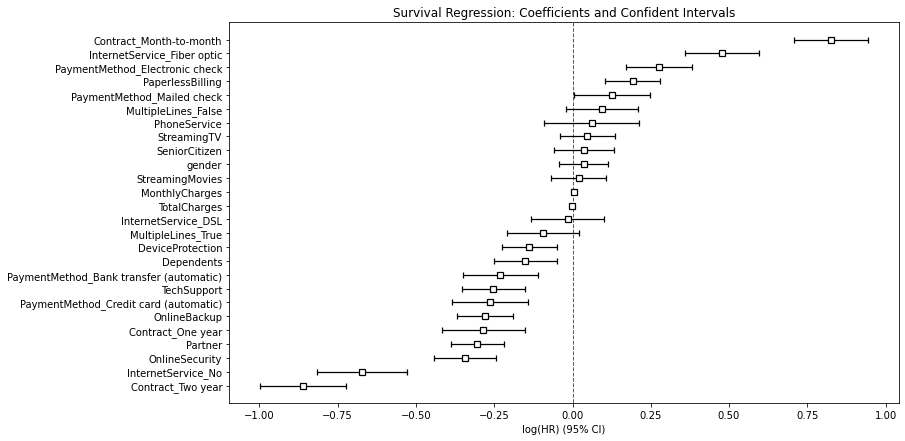

In [22]:
# plotting coefficients
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);

In [23]:
# function for creating Kaplan-Meier curve plots segmented
# by categorical variables
def plot_categorical_survival(feature, t='tenure', event='Churn', df=Telco, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf.plot(ax=ax, label=cat)

####  Churn by contract type needs to be checked since Contract_Month-to-month has the highest coefficiency level of customers churn.

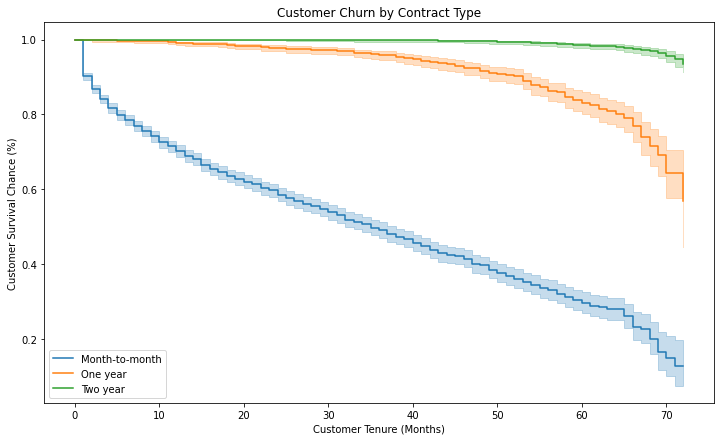

In [24]:
fig_contract, ax_contract = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='Contract', ax=ax_contract)
ax_contract.set_title('Customer Churn by Contract Type')
ax_contract.set_xlabel('Customer Tenure (Months)')
ax_contract.set_ylabel('Customer Survival Chance (%)')
plt.show()

####  Consumers paying month-to-months are less likely to continue with the service while those with two-year contracts will keep the service, and most likely to renew the service even after 60 months periods.

In [25]:
Telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

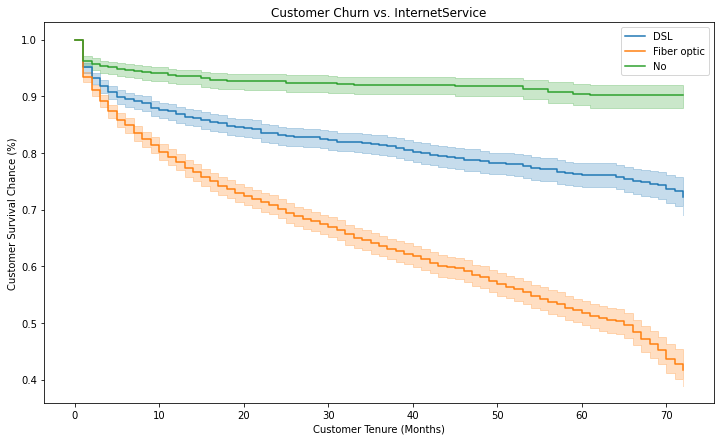

In [26]:
fig_dep, ax_dep = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='InternetService', ax=ax_dep)
ax_dep.set_title('Customer Churn vs. InternetService')
ax_dep.set_xlabel('Customer Tenure (Months)')
ax_dep.set_ylabel('Customer Survival Chance (%)')
plt.show()

####  Fiber optic services will see  customers dropping out sharply after couple months.

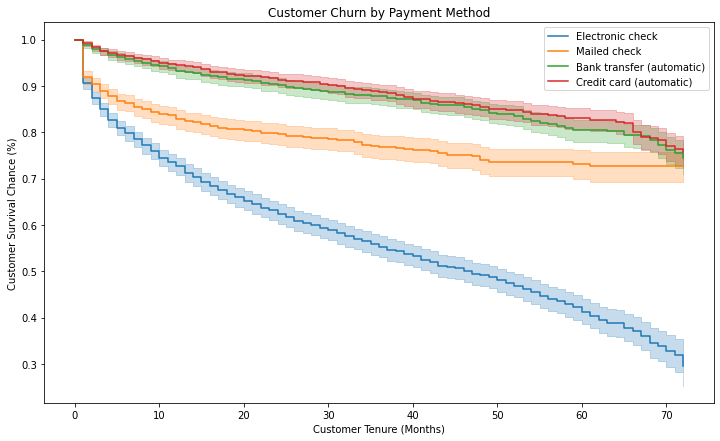

In [27]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='PaymentMethod', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by Payment Method')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Chance (%)')
plt.show()

## Interpretation

#### The best method of reducing customer churn is to convert customers paying month-to-month to 2-year contracts. 2 year contract holders are the least likely group to stop the service, with exponential coefficiency of 0.42, while month-to-month paying customers have the highest churn rate. </br>

#### Fiber optic service needs to be reviewed. </br>

#### Payment by electronic checks need to be discouraged for customers are less likely to continue the service.


In [28]:
test_id = Telco_Cox.sample(1)

In [29]:
test_id

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_False,MultipleLines_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
4980,1,1,True,False,22.0,True,False,False,False,False,False,False,False,25.6,548.8,0.0,0,1,0,1,0,1,0,0,0,0,0,1


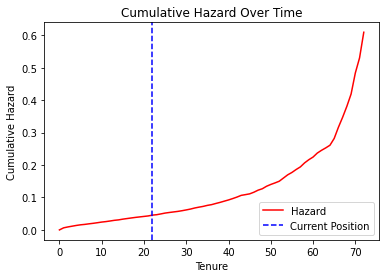

In [30]:
fig, ax = plt.subplots()
cph.predict_cumulative_hazard(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Hazard','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Cumulative Hazard', size = 10)
ax.set_title('Cumulative Hazard Over Time');

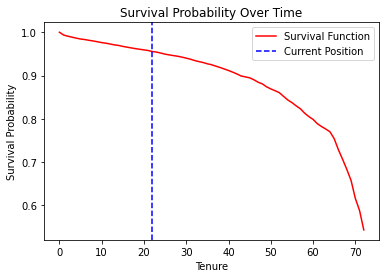

In [31]:
fig, ax = plt.subplots()
cph.predict_survival_function(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Survival Probability', size = 10)
ax.set_title('Survival Probability Over Time');

In [32]:
def LTV(info):
    life = cph.predict_survival_function(info).reset_index()
    life.columns = ['Tenure', 'Probability']
    max_life = life.Tenure[life.Probability > 0.1].max()
    
    LTV = max_life * info['MonthlyCharges'].values[0]
    return LTV

In [33]:
print('LTV of a testid is:', LTV(test_id), 'dollars.')

LTV of a testid is: 1843.2 dollars.
